In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [2]:
def fetch_url_data(pageNo):
  
# url = 'https://www.amazon.com/Crocs-Unisex-Adult-Classic-Water-Comfortable/product-reviews/B08L7T3L8C/ref=cm_cr_arp_d_paging_btm_next_'+str(pageNo)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(pageNo)
    url = 'https://www.amazon.com/Crocs-Unisex-Adult-Classic-Water-Comfortable/product-reviews/B08L7T3L8C/ref=cm_cr_getr_d_paging_btm_next_'+str(pageNo)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(pageNo)+'&filterByStar=positive'
    headers={"user-agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.2 Safari/605.1.15","Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page=requests.get(url, headers=headers)
    
    soup = BeautifulSoup(page.content)
    


      # r = requests.get('https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
      # content = r.content
      # soup = BeautifulSoup(content)



    table = []
    for a in soup.find_all('div', attrs={'class':'a-section review aok-relative'}):
        author_name = a.find('span',attrs={'class':'a-profile-name'})
        title = a.find('a', attrs={'class':'a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold'})
        rating = a.find('span', attrs={'class':'a-icon-alt'})
        review = a.find('span', attrs={'class':'a-size-base review-text review-text-content'})
        size = a.find('a', attrs={'class':'a-size-mini a-link-normal a-color-secondary'})
        helpfullness = a.find('div', attrs={'class':'a-row a-spacing-small'})
        review_date = a.find('span', attrs={'class','a-size-base a-color-secondary review-date'})
        
        columns=[]
        
        if title is not None:
            columns.append(title.text)
        else:
            columns.append(np.nan)
            
        if author_name is not None:
            columns.append(author_name.text)
        else:
            columns.append(np.nan)

        if rating is not None:
            columns.append(rating.text)
        else:
            columns.append(np.nan)
            
        if review is not None:
            columns.append(review.text)
        else:
            columns.append(np.nan)
            
        if size is not None:
            columns.append(size.text)
        else:
            columns.append(np.nan)
            
        if helpfullness is not None:   
            columns.append(helpfullness.text)
        else:
            columns.append(np.nan)
            
        if review_date is not None:
            columns.append(review_date.text)
        else:
            columns.append(np.nan)
            
        table.append(columns)
              
    return table

In [3]:
complete_data = []
for i in range(0, 3000):
    complete_data.append(fetch_url_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]

In [4]:
df = pd.DataFrame(flatten(complete_data),columns=['Title','Author Name','Rating','Review', 'Size', 'Helpfullness', 'Review_Date'])
df.head(80)

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date
0,\nHow Crocs Changed My Life\n,Heidi Bumanlag,5.0 out of 5 stars,"\n\n I will admit, I once was a hater. I live...",Size: 7 Women/5 MenColor: Lemon,"1,903 people found this helpful","Reviewed in the United States on September 30,..."
1,\nCall me a Croc Enthusiast!!\n,A. Roumie,5.0 out of 5 stars,\n\n I LOVE THESE THINGS!! They're stylish an...,Size: 10 Women/8 MenColor: Navy,513 people found this helpful,"Reviewed in the United States on August 15, 2017"
2,\nFreesail vs Classic\n,Jeanne,5.0 out of 5 stars,\n\n I own 2 pair of Crocs women's Freesail a...,Size: 9 Women/7 MenColor: White,323 people found this helpful,"Reviewed in the United States on July 22, 2017"
3,\nCutest Comfy Ugly Shoe You Can Buy\n,FLRL,5.0 out of 5 stars,\n\n I bought this classic fit (wide) shoe in...,Size: 8 Women/6 MenColor: Black,211 people found this helpful,"Reviewed in the United States on October 17, 2017"
4,\nand we like how easy it is to get them on\n,Tyler,5.0 out of 5 stars,"\n\n I never, ever thought I'd wear Crocs, bu...",Size: 14 Women/12 MenColor: Khaki,178 people found this helpful,"Reviewed in the United States on October 11, 2017"
...,...,...,...,...,...,...,...
75,\nMust Buy!\n,Tee H,5.0 out of 5 stars,\n\n I was pretty skeptical about purchasing ...,Size: 8 Women/6 MenColor: White,2 people found this helpful,"Reviewed in the United States on May 5, 2019"
76,"\nExcellent for pool deck, locker room, and at...",Nina Jordan,5.0 out of 5 stars,\n\n Excellent sandal for walking on the pool...,Size: 9 Women/7 MenColor: Black,2 people found this helpful,"Reviewed in the United States on May 24, 2020"
77,\nI LOVE MY CROCS.\n,Rachel,5.0 out of 5 stars,\n\n I was so excited to get the cyan blue cr...,Size: 6 Women/4 MenColor: Ice Blue,4 people found this helpful,"Reviewed in the United States on December 30, ..."
78,\nPerfect in every way\n,AndieJoy,5.0 out of 5 stars,\n\n I needed some slip-on shoes to wear whil...,Size: 11 Women/9 MenColor: Black,One person found this helpful,"Reviewed in the United States on February 19, ..."


In [5]:
df.describe()

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date
count,5010,5010,5010,5010,4826,451,5010
unique,3797,4270,2,4862,283,26,1424
top,\nComfortable\n,Amazon Customer,5.0 out of 5 stars,\n\n Great\n\n,Size: 13 Women/11 MenColor: Black,One person found this helpful,"Reviewed in the United States on July 24, 2020"
freq,79,305,4444,14,148,310,23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         5010 non-null   object
 1   Author Name   5010 non-null   object
 2   Rating        5010 non-null   object
 3   Review        5010 non-null   object
 4   Size          4826 non-null   object
 5   Helpfullness  451 non-null    object
 6   Review_Date   5010 non-null   object
dtypes: object(7)
memory usage: 274.1+ KB


In [7]:
df.to_csv('crocs_review_positive.csv', index=False, encoding='utf-8')

In [115]:
df = pd.read_csv("crocs_review_positive.csv")
df.head()

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date
0,\nHow Crocs Changed My Life\n,Heidi Bumanlag,5.0 out of 5 stars,"\n\n I will admit, I once was a hater. I live...",Size: 7 Women/5 MenColor: Lemon,"1,903 people found this helpful","Reviewed in the United States on September 30,..."
1,\nCall me a Croc Enthusiast!!\n,A. Roumie,5.0 out of 5 stars,\n\n I LOVE THESE THINGS!! They're stylish an...,Size: 10 Women/8 MenColor: Navy,513 people found this helpful,"Reviewed in the United States on August 15, 2017"
2,\nFreesail vs Classic\n,Jeanne,5.0 out of 5 stars,\n\n I own 2 pair of Crocs women's Freesail a...,Size: 9 Women/7 MenColor: White,323 people found this helpful,"Reviewed in the United States on July 22, 2017"
3,\nCutest Comfy Ugly Shoe You Can Buy\n,FLRL,5.0 out of 5 stars,\n\n I bought this classic fit (wide) shoe in...,Size: 8 Women/6 MenColor: Black,211 people found this helpful,"Reviewed in the United States on October 17, 2017"
4,\nand we like how easy it is to get them on\n,Tyler,5.0 out of 5 stars,"\n\n I never, ever thought I'd wear Crocs, bu...",Size: 14 Women/12 MenColor: Khaki,178 people found this helpful,"Reviewed in the United States on October 11, 2017"


In [116]:
df['Title'] = df['Title'].replace('\n', '',regex=True)
df['Review'] = df['Review'].replace('\n', '',regex=True)

In [117]:
df[['Size','Colour']] = df['Size'].str.split("Color:",expand=True)


In [118]:
df[['Men Size','Women Size']] = df['Size'].str.split("/",expand=True)
del df['Size']


In [119]:
df['Men Size'] = df['Men Size'].str.extract('(\d+.\d+|\d+)')
df['Women Size'] = df['Women Size'].str.extract('(\d+.\d+|\d+)')
df['Rating'] = df['Rating'].str.extract('(\d+.\d+|\d+)')


In [120]:
df['Review_Date'] = df['Review_Date'].str[33:]
df.head()

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,How Crocs Changed My Life,Heidi Bumanlag,5.0,"I will admit, I once was a hater. I lived a ...","1,903 people found this helpful","September 30, 2019",Lemon,7,5
1,Call me a Croc Enthusiast!!,A. Roumie,5.0,I LOVE THESE THINGS!! They're stylish and fu...,513 people found this helpful,"August 15, 2017",Navy,10,8
2,Freesail vs Classic,Jeanne,5.0,I own 2 pair of Crocs women's Freesail and f...,323 people found this helpful,"July 22, 2017",White,9,7
3,Cutest Comfy Ugly Shoe You Can Buy,FLRL,5.0,I bought this classic fit (wide) shoe in siz...,211 people found this helpful,"October 17, 2017",Black,8,6
4,and we like how easy it is to get them on,Tyler,5.0,"I never, ever thought I'd wear Crocs, but he...",178 people found this helpful,"October 11, 2017",Khaki,14,12


In [121]:
df['Helpfullness'] = df['Helpfullness'].str.split().str.get(0)

In [122]:
df['Helpfullness'] = df['Helpfullness'].str.replace(',','')
df['Helpfullness'] = df['Helpfullness'].str.replace('One','1')
df.head(50)

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,How Crocs Changed My Life,Heidi Bumanlag,5.0,"I will admit, I once was a hater. I lived a ...",1903,"September 30, 2019",Lemon,7,5
1,Call me a Croc Enthusiast!!,A. Roumie,5.0,I LOVE THESE THINGS!! They're stylish and fu...,513,"August 15, 2017",Navy,10,8
2,Freesail vs Classic,Jeanne,5.0,I own 2 pair of Crocs women's Freesail and f...,323,"July 22, 2017",White,9,7
3,Cutest Comfy Ugly Shoe You Can Buy,FLRL,5.0,I bought this classic fit (wide) shoe in siz...,211,"October 17, 2017",Black,8,6
4,and we like how easy it is to get them on,Tyler,5.0,"I never, ever thought I'd wear Crocs, but he...",178,"October 11, 2017",Khaki,14,12
5,I have avoided crocs because they are big clow...,Grace Jane,5.0,These are my first crocs. I have avoided cr...,680,"August 5, 2015",Pool,8,6
6,Never thought I'd buy but very happy now,Chris Luiszer,5.0,Never thought I'd buy a pair of crocs. I've ...,80,"December 14, 2017",Black,13,11
7,Comfy but there are size inconsistencies,WampThing,4.0,"I ordered 2 pairs of these crocs classics, c...",96,"March 31, 2017",Pepper,11,9
8,"Yay, crocs!",captainbars,5.0,"Because of wide feet, I've been afraid of or...",81,"May 11, 2017",White,8,6
9,OBSESSED.,Lindsey,5.0,these just arrived not even 10 minutes ago a...,24,"May 18, 2020",Pink Lemonade,6,4


In [123]:
df['Men Size'] = pd.to_numeric(df['Men Size'], errors='coerce')
df['Women Size'] = pd.to_numeric(df['Women Size'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Helpfullness'] = pd.to_numeric(df['Helpfullness'], errors='coerce')
df.head()

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,How Crocs Changed My Life,Heidi Bumanlag,5.0,"I will admit, I once was a hater. I lived a ...",1903.0,"September 30, 2019",Lemon,7.0,5.0
1,Call me a Croc Enthusiast!!,A. Roumie,5.0,I LOVE THESE THINGS!! They're stylish and fu...,513.0,"August 15, 2017",Navy,10.0,8.0
2,Freesail vs Classic,Jeanne,5.0,I own 2 pair of Crocs women's Freesail and f...,323.0,"July 22, 2017",White,9.0,7.0
3,Cutest Comfy Ugly Shoe You Can Buy,FLRL,5.0,I bought this classic fit (wide) shoe in siz...,211.0,"October 17, 2017",Black,8.0,6.0
4,and we like how easy it is to get them on,Tyler,5.0,"I never, ever thought I'd wear Crocs, but he...",178.0,"October 11, 2017",Khaki,14.0,12.0


In [124]:
from datetime import datetime

In [125]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])
df['Review_Date'] = df['Review_Date'].dt.year
df.head()

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,How Crocs Changed My Life,Heidi Bumanlag,5.0,"I will admit, I once was a hater. I lived a ...",1903.0,2019,Lemon,7.0,5.0
1,Call me a Croc Enthusiast!!,A. Roumie,5.0,I LOVE THESE THINGS!! They're stylish and fu...,513.0,2017,Navy,10.0,8.0
2,Freesail vs Classic,Jeanne,5.0,I own 2 pair of Crocs women's Freesail and f...,323.0,2017,White,9.0,7.0
3,Cutest Comfy Ugly Shoe You Can Buy,FLRL,5.0,I bought this classic fit (wide) shoe in siz...,211.0,2017,Black,8.0,6.0
4,and we like how easy it is to get them on,Tyler,5.0,"I never, ever thought I'd wear Crocs, but he...",178.0,2017,Khaki,14.0,12.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         5010 non-null   object 
 1   Author Name   5010 non-null   object 
 2   Rating        5010 non-null   float64
 3   Review        5010 non-null   object 
 4   Helpfullness  451 non-null    float64
 5   Review_Date   5010 non-null   int64  
 6   Colour        4826 non-null   object 
 7   Men Size      4826 non-null   float64
 8   Women Size    4802 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 352.4+ KB


In [127]:
colour_counts = df['Colour'].value_counts()
df.head()

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,How Crocs Changed My Life,Heidi Bumanlag,5.0,"I will admit, I once was a hater. I lived a ...",1903.0,2019,Lemon,7.0,5.0
1,Call me a Croc Enthusiast!!,A. Roumie,5.0,I LOVE THESE THINGS!! They're stylish and fu...,513.0,2017,Navy,10.0,8.0
2,Freesail vs Classic,Jeanne,5.0,I own 2 pair of Crocs women's Freesail and f...,323.0,2017,White,9.0,7.0
3,Cutest Comfy Ugly Shoe You Can Buy,FLRL,5.0,I bought this classic fit (wide) shoe in siz...,211.0,2017,Black,8.0,6.0
4,and we like how easy it is to get them on,Tyler,5.0,"I never, ever thought I'd wear Crocs, but he...",178.0,2017,Khaki,14.0,12.0


In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
colour_counts

 Black                1103
 White                 611
 Navy                  520
 Khaki                 294
 Slate Grey            276
 Chocolate             226
 Lemon                 222
 Pepper                170
 Lavender              131
 Ice Blue              130
 Ballerina Pink        119
 Neon Purple           101
 Tangerine              97
 Melon                  87
 Neo Mint               78
 Pool                   77
 Army Green             67
 Bright Cobalt          67
 Grass Green            64
 Garnet                 47
 Pink Lemonade          45
 Cantaloupe             42
 New Mint               36
 Electric Pink          29
 Chambray Blue          28
 Cobblestone            26
 Tropical Teal          24
 Blossom                23
 White/Cantaloupe       16
 Lime Punch             14
 White/Green Ombre      14
 Deep Green             14
 Citrus                 12
 Lapis                   8
 White/Neon Green        7
 Spicy Orange            1
Name: Colour, dtype: int64

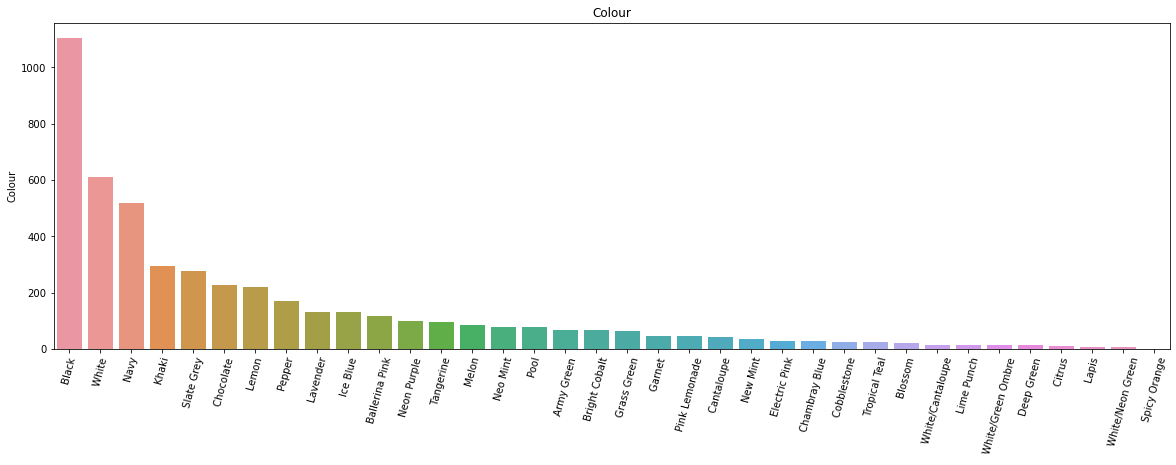

In [139]:
plt.figure(figsize=(20,6))
sns.barplot(x=colour_counts.index, y=colour_counts)
plt.xticks(rotation=75)
plt.title('Colour')
plt.show()

In [135]:
review_counts_date_wise = df['Review_Date'].value_counts()
review_counts_date_wise

2020    2948
2019    1053
2018     358
2017     229
2016     150
2015     108
2014      79
2013      69
2012       6
2010       5
2008       4
2009       1
Name: Review_Date, dtype: int64

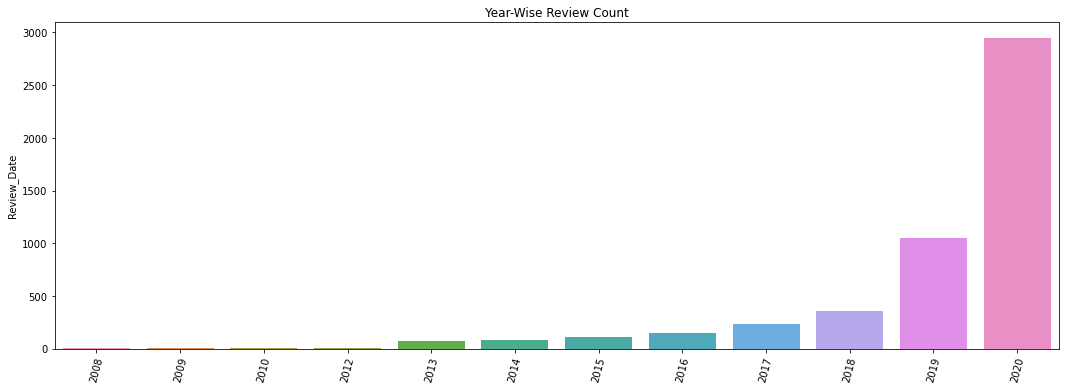

In [143]:
plt.figure(figsize=(18,6))
sns.barplot(x=review_counts_date_wise.index, y=review_counts_date_wise)
plt.xticks(rotation=75)
plt.title('Year-Wise Review Count')
plt.show()

In [144]:
men_size_counts = df['Men Size'].value_counts()

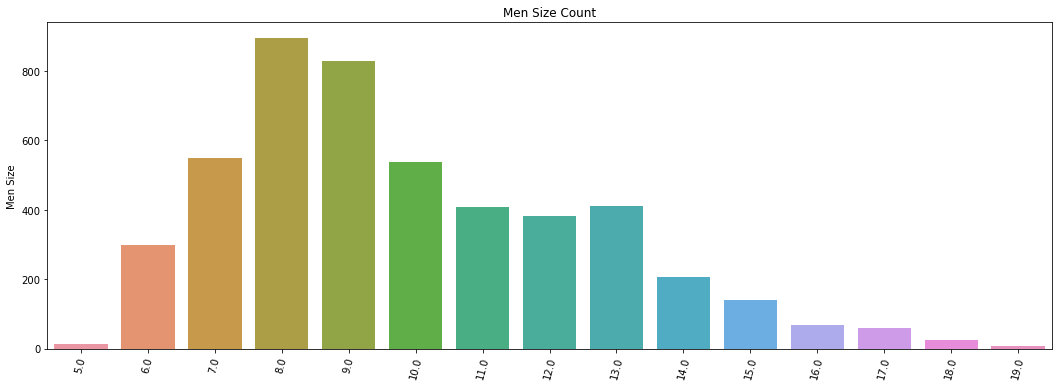

In [145]:
plt.figure(figsize=(18,6))
sns.barplot(x=men_size_counts.index, y=men_size_counts)
plt.xticks(rotation=75)
plt.title('Men Size Count')
plt.show()

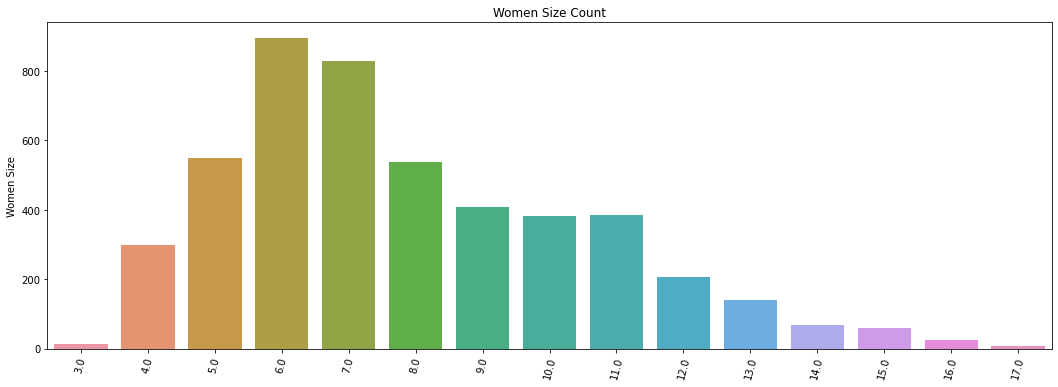

In [146]:
Women_size_counts = df['Women Size'].value_counts()

plt.figure(figsize=(18,6))
sns.barplot(x=Women_size_counts.index, y=Women_size_counts)
plt.xticks(rotation=75)
plt.title('Women Size Count')
plt.show()

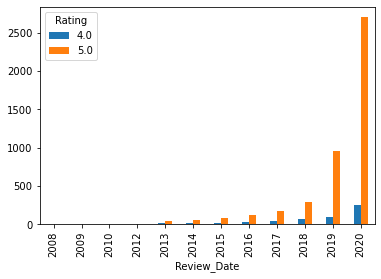

In [12]:
pd.crosstab(df['Review_Date'], df['Rating']).plot(kind="bar")
plt.show()

In [13]:
crocs_reviews_string = " ".join(df['Review'])


In [149]:
from nltk.corpus import stopwords

In [15]:
# Removing unwanted symbols incase if exists
crocs_reviews_string = re.sub("[^A-Za-z" "]+"," ",crocs_reviews_string).lower()
crocs_reviews_string = re.sub("[0-9" "]+"," ",crocs_reviews_string)


# words that contained in crocs reviews
crocs_reviews_words = crocs_reviews_string.split(" ")

stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")


crocs_reviews_words = [w for w in crocs_reviews_words if not w in stop_words]
# Joinining all the reviews into single paragraph 
crocs_reviews_string = " ".join(crocs_reviews_words)



In [16]:
crocs_reviews_string

' admit hater lived hateful negative life truly despised footwear recently made many drastic life changes shoes helped see light helped see beauty world give confidence face whatever obstacles life may throw way walk outside confidence shoes marvelous shoes help live life fullest style comfort amount words begin describe continue live life open mind fashion statements live head hung low wear crocs pride sports mode empowers relaxed mode truly epitome serenity crocs also glue bonded one best friends crocs truly change life bring people together forever indebted spectacular shoe love things stylish functional shoes future hard pull outfit wear school wear run errands wear church sure nothing compare wonderful shoes shoes really show individuality variety colors endless shoe charms express unique fashionable way trend setter crocs shoes never gone style pair crocs women freesail figured try pair classics freesail much trimmer narrower width women classics love classics quite bit boxier wi

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

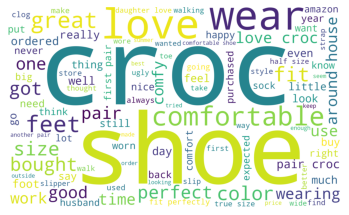

In [18]:
wordcloud_ip = WordCloud(
                      background_color='white',
                    width=2000,
                    height=1200,
                      max_words = 100
                     ).generate(crocs_reviews_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

In [147]:
crocs_review_title_string = " ".join(df['Title'])

In [151]:
# Removing unwanted symbols incase if exists
crocs_review_title_string = re.sub("[^A-Za-z" "]+"," ",crocs_review_title_string).lower()
crocs_review_title_string = re.sub("[0-9" "]+"," ",crocs_review_title_string)


# words that contained in crocs reviews
crocs_review_title_words = crocs_review_title_string.split(" ")

stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")


crocs_review_title_words = [w for w in crocs_review_title_words if not w in stop_words]
# Joinining all the reviews into single paragraph 
crocs_review_title_string = " ".join(crocs_review_title_words)

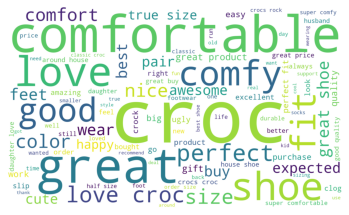

In [152]:
wordcloud_ip = WordCloud(
                      background_color='white',
                    width=2000,
                    height=1200,
                      max_words = 100
                     ).generate(crocs_review_title_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()